In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split
from ISLP import confusion_table

In [2]:
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

In [3]:
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.pipeline import Pipeline
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from l0bnb import fit_path

In [5]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)

In [6]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm

# 8.

We will now perform cross-validation on a simulated data set.

# a)

In [7]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

n = 100, broj podataka (data lenght)

p = 2, $x$ i $x^2$

$Y = X - 2X^2 + \epsilon$

# b)

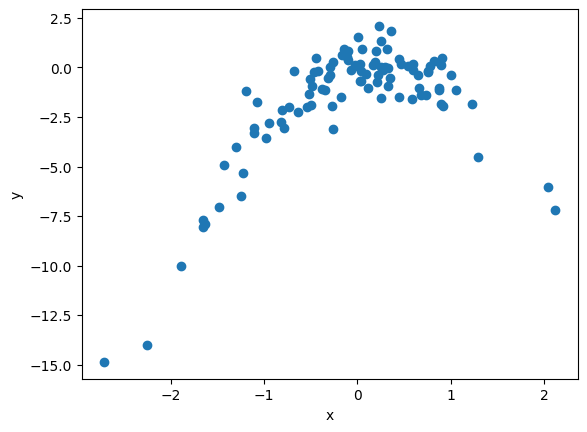

In [8]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Oblik konkavne parabole s negativnom diskriminantom, gdje je otprilike $X \in <-3,3>$ i $Y \in <-15,2.5>$.

A concave parabola shape with a negative discriminant, approximately where $X \in <-3,3>$ and $Y \in <-15,2.5>$.

In [9]:
print('x_min:',x.min(),'x_max:',x.max())
print('y_min:',y.min(),'y_max:',y.max())

x_min: -2.7111624789659685 x_max: 2.1178387550510482
y_min: -14.864068638188634 y_max: 2.097053679347162


# c)

In [10]:
#epsilon = rng.normal(size=100)
data = {"X": x,"Y": y}
df = pd.DataFrame(data)

In [11]:
rng = np.random.default_rng(1)
LOOCV_error = np.zeros(4)
H = np.array(df['X'])
Y = np.array(df['Y'])
M = sklearn_sm(sm.OLS)
for i, d in enumerate(range(1,5)):
    X = np.power.outer(H, np.arange(d+1))
    #X = np.c_[ X, epsilon ] 
    M_CV = cross_validate(M,
                          X,
                          Y,
                          cv=df.shape[0])
    LOOCV_error[i] = np.mean(M_CV['test_score'])
LOOCV_error

array([6.63302984, 1.12293686, 1.30179655, 1.33239427])

# d)

In [12]:
#epsilon = rng.normal(size=100)
rng = np.random.default_rng(10)
LOOCV_error = np.zeros(4)
H = np.array(df['X'])
Y = np.array(df['Y'])
M = sklearn_sm(sm.OLS)
for i, d in enumerate(range(1,5)):
    X = np.power.outer(H, np.arange(d+1))
    #X = np.c_[ X, epsilon ] 
    M_CV = cross_validate(M,
                          X,
                          Y,
                          cv=df.shape[0])
    LOOCV_error[i] = np.mean(M_CV['test_score'])
LOOCV_error

array([6.63302984, 1.12293686, 1.30179655, 1.33239427])

Rezultati su identični jer nije bitno kojim redoslijedom testiramo sve modele i tražimo greške.

The results are identical because the order in which we test all the models and calculate the errors does not matter.

# e)

Kvadratni model je imao najmanju grešku, to se moglo očekivati jer su Y podaci generirani pomoću linearnog i kvadratnog člana.

The quadratic model had the smallest error, which was expected since the Y data were generated using linear and quadratic terms.

# f)

In [13]:
X = MS(['X']).fit_transform(df)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)
#results.summary()

,coef,std err,t,P>|t|
intercept,-1.4650,0.247,-5.937,0.0
X,1.9494,0.289,6.752,0.0


In [14]:
X = MS([poly('X',degree=2)]).fit_transform(df)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)
#results.summary()

,coef,std err,t,P>|t|
intercept,-1.6085,0.101,-15.974,0.0
"poly(X, degree=2)[0]",16.6000,1.007,16.486,0.0
"poly(X, degree=2)[1]",-22.2244,1.007,-22.072,0.0


In [15]:
X = MS([poly('X',degree=3)]).fit_transform(df)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)
#results.summary()

,coef,std err,t,P>|t|
intercept,-1.6085,0.101,-15.986,0.000
"poly(X, degree=3)[0]",16.6000,1.006,16.499,0.000
"poly(X, degree=3)[1]",-22.2244,1.006,-22.089,0.000
"poly(X, degree=3)[2]",-1.0768,1.006,-1.070,0.287


In [16]:
X = MS([poly('X',degree=4)]).fit_transform(df)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)
#results.summary()

,coef,std err,t,P>|t|
intercept,-1.6085,0.098,-16.343,0.000
"poly(X, degree=4)[0]",16.6000,0.984,16.867,0.000
"poly(X, degree=4)[1]",-22.2244,0.984,-22.581,0.000
"poly(X, degree=4)[2]",-1.0768,0.984,-1.094,0.277
"poly(X, degree=4)[3]",2.2726,0.984,2.309,0.023


Linearni i kvadratni član su statistički značajni, dok veći članovi imaju veliku $p$ vrijednost. Ukratko, rezultati su u slaganju s LOOCV analizom. 

The linear and quadratic terms are statistically significant, while the higher-order terms have large $p$-values. In short, the results are consistent with the LOOCV analysis.